In [78]:
import pandas as pd
import datetime
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:


cidades_search = {"Ara" : "Araucária", "Cur" : "Curitiba","Cam": "Campo Largo", "Con" : "Contenda", "Faz":"Fazenda Rio Grande"}

dicionario_dataframes = {}
dicionario_dataframes_car = {}

data_atual = datetime.datetime.now().date()


for chave, cidade in cidades_search.items():
    arquivo_imoveis = "imobiliaria_a_" + chave + "_" + str(data_atual) + ".csv"
    caminho_arquivo_imoveis_a = "../dataframes_" + str(data_atual) + "/" + arquivo_imoveis
    chave_dicionario_i = chave
    chave_dicionario_car = chave + "car"

    arquivo_imoveis_caracteristica = "imobiliaria_a_caracteristica_"+ chave + "_"  + str(data_atual) + ".csv"
    caminho_arquivo_imoveis_caract_a = "../dataframes_" + str(data_atual) + "/" + arquivo_imoveis_caracteristica

    dicionario_dataframes[chave_dicionario_i] = pd.read_csv(caminho_arquivo_imoveis_a, sep=";")
    dicionario_dataframes_car[chave_dicionario_car] = pd.read_csv(caminho_arquivo_imoveis_caract_a, sep=";")


In [80]:
dicionarios_concatenado = [df for df in dicionario_dataframes.values()]

df_imoveis = pd.concat(dicionarios_concatenado, axis=0)
df_imoveis.head()

,status,finalidade,tipo,dormitorios,quartos,cidade,cep,endereco,numero,complemento,...,iptu,promocao,dataregistro,condominiofechado,zoneamento,ImovelEntregue,datacadastro,dataupdate,Andar,valor_total
0,Disponível,Residencial,Sobrado,3,2,Araucária,83702240,Rua Paulo Alves Pinto,1920.0,sob 02,...,0.0,N,2023-09-27T00:10:26.800,N,Z,0,2023-08-21T11:43:57.460,NaN,0,600000.0
1,Disponível,Residencial,Sobrado,3,2,Araucária,83701825,Rua Jean Becue,960.0,NaN,...,0.0,N,2023-09-27T00:10:26.800,N,Z,0,2023-09-11T16:51:22.757,NaN,0,450000.0
2,Disponível,Comercial/Residencial,Sobrado,4,4,Araucária,83701650,Rua Rodolfo Hasselmann,1697.0,SOBRADO,...,0.0,N,2023-09-27T00:10:26.800,N,ZR2,0,2023-05-18T16:44:01.570,NaN,0,780000.0
3,Disponível,Comercial/Residencial,Sobrado,3,3,Araucária,83706160,Rua Arapongas,329.0,NaN,...,0.0,N,2023-09-27T00:10:26.800,N,ZR2,0,2023-05-19T15:11:51.220,NaN,0,650000.0
4,Disponível,Residencial,Sobrado,3,2,Araucária,83701220,Rua Bahia,151.0,NaN,...,0.0,N,2023-09-27T00:10:26.800,N,Z,0,2023-09-26T16:01:24.017,NaN,0,450000.0


In [81]:
count_cidade = df_imoveis.cidade.value_counts()
count_cidade

Curitiba              200
Campo Largo           123
Fazenda Rio Grande     68
Araucária              51
Contenda                4
Name: cidade, dtype: int64

In [82]:

df_cidades = df_imoveis.cidade.value_counts().to_frame().reset_index()

In [83]:
df_cidades.columns = ["Cidade", "Total"]
df_cidades

,Cidade,Total
0,Curitiba,200
1,Campo Largo,123
2,Fazenda Rio Grande,68
3,Araucária,51
4,Contenda,4


Text(4.944444444444445, 0.5, 'Quantidade de imoveis')

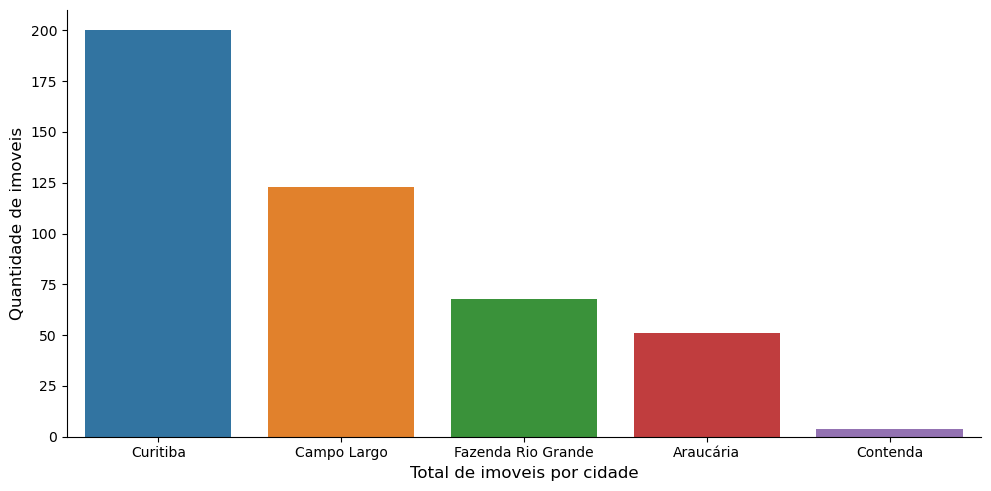

In [105]:
sns.color_palette("crest")
total_cidades = df_imoveis.cidade.value_counts()
sns.catplot(x="cidade", kind="count", data=df_imoveis, aspect=2, order=total_cidades.index)
plt.xlabel("Total de imoveis por cidade", fontsize=12)
plt.ylabel("Quantidade de imoveis",fontsize=12)